# 第15章: 実践！タイタニック - EDA & 特徴量エンジニアリング

## 📋 この章で学ぶこと

この章を終えると、以下ができるようになります：

- [ ] タイタニックデータセットを理解し、探索的データ分析（EDA）ができる
- [ ] 欠損値の戦略的な補完ができる
- [ ] 意味のある特徴量を作成できる（敬称、家族サイズなど）
- [ ] データから洞察を得て、仮説を立てられる

## 🎯 前提知識

この章を学ぶには以下の知識が必要です：

- ✅ Notebook 02（前処理とFeature Engineering）
- ✅ Notebook 03（評価指標）
- ✅ 基本的なPandas操作

⏱️ **推定学習時間**: 120分  
📊 **難易度**: ★★★★☆（上級）  
🎓 **カテゴリ**: 実践・データ分析

---

## 🚢 タイタニック問題とは？

**Kaggleで最も有名な入門コンペティション**です。

**問題設定**：
1912年、タイタニック号の沈没事故で、誰が生き残ったかを予測します。

**データ**：
- 乗客の情報（年齢、性別、チケットクラス、家族構成など）
- 生存/死亡の記録

**なぜ重要？**
- 実際のデータで学べる
- 欠損値や特徴量エンジニアリングの練習に最適
- Kaggleでの実績になる

**この章の目標**：
データを深く理解し、モデルに投入できる形に整えることです。
**モデリングは次章（Notebook 16）で行います。**

---

In [1]:
# ============================================================
# [コードの説明]
# ============================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

np.random.seed(42)

print("Libraries loaded successfully!")

Libraries loaded successfully!


#### 📦 必要なライブラリの読み込み

EDA（探索的データ分析）では、可視化が非常に重要です。
SeabornとMatplotlibを使って、データの傾向を視覚的に理解していきます。

## Part 1: データの読み込みと初期確認

In [2]:
# ============================================================
# [コードの説明]
# ============================================================

# Load Titanic dataset from seaborn
df = sns.load_dataset('titanic')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()

Dataset loaded successfully!
Shape: (891, 15)

First 5 rows:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**データセットの概要**：

- **891行**: 訓練データの乗客数
- **15列**: 各乗客の特徴量

**主要な列の意味**：
- `survived`: 生存フラグ（0=死亡, 1=生存）← これが目的変数
- `pclass`: チケットクラス（1=上級, 2=中級, 3=下級）
- `sex`: 性別
- `age`: 年齢
- `sibsp`: 兄弟・配偶者の数
- `parch`: 親・子供の数
- `fare`: 運賃
- `embarked`: 乗船港（C=Cherbourg, Q=Queenstown, S=Southampton）
- `class`: pclassの文字列版
- `who`: 男性/女性/子供の分類
- `adult_male`: 成人男性フラグ
- `deck`: デッキ（客室の階）
- `embark_town`: 乗船港の都市名
- `alive`: 生存の文字列版
- `alone`: 一人旅フラグ

In [3]:
# Basic information
print("Dataset Information:")
print("="*60)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
# Statistical summary
print("\nStatistical Summary:")
df.describe()


Statistical Summary:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**重要な観察**：

1. **欠損値がある**:
   - `age`: 177個の欠損（891中）
   - `deck`: 688個の欠損（ほとんど欠損）
   - `embarked`: 2個の欠損

2. **生存率**:
   - 平均が0.38 → 約38%の乗客が生存
   - 62%が死亡（不均衡データ）

3. **年齢**:
   - 最小: 0.42歳（赤ちゃん）
   - 最大: 80歳
   - 平均: 約30歳

4. **運賃**:
   - 最大512ドル（高額チケット）
   - 中央値: 14ドル
   - 分布が偏っている可能性

In [5]:
# Check missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_percent
}).sort_values('Missing Count', ascending=False)

print("\nMissing Values:")
print("="*60)
print(missing_df[missing_df['Missing Count'] > 0])


Missing Values:
             Missing Count  Percentage
deck                   688   77.216611
age                    177   19.865320
embarked                 2    0.224467
embark_town              2    0.224467


**欠損値の戦略**：

1. **deck**: 77%欠損 → **削除**または**欠損自体を特徴量にする**
2. **age**: 20%欠損 → **推定して補完**（後で詳しく）
3. **embarked**: 0.2%欠損 → **最頻値で補完**

欠損値の扱いは、モデル性能に大きく影響します。

## Part 2: 生存率の分析（EDA）

Overall Survival Rate: 38.38%
Death Rate: 61.62%


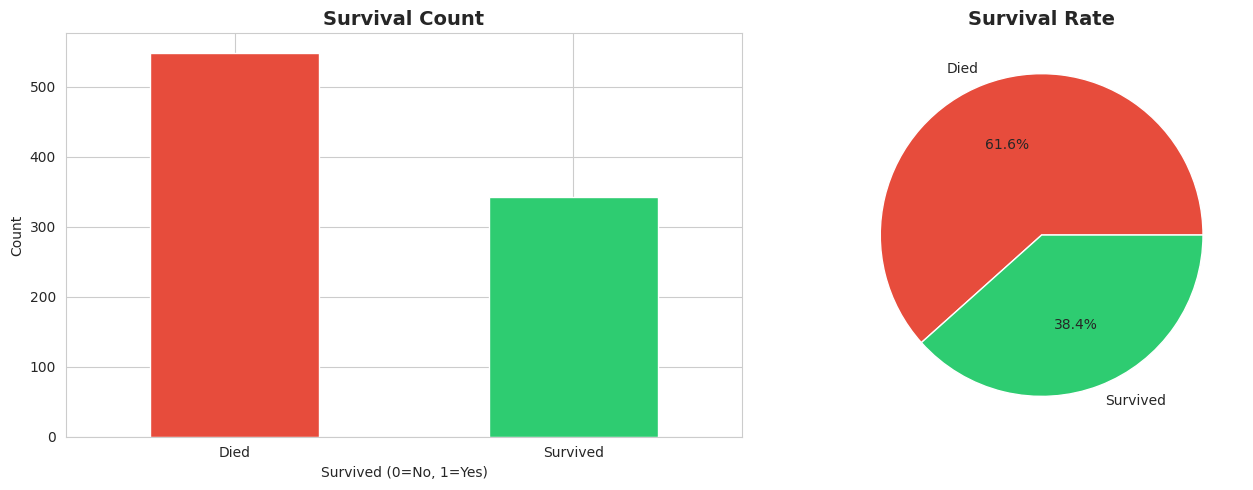

In [6]:
# ============================================================
# [コードの説明]
# ============================================================

# Overall survival rate
survival_rate = df['survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.2%}")
print(f"Death Rate: {1-survival_rate:.2%}")

# Survival count
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['survived'].value_counts().plot(kind='bar', ax=axes[0], color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Survival Count', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Survived (0=No, 1=Yes)')
axes[0].set_ylabel('Count')
axes[0].set_xticklabels(['Died', 'Survived'], rotation=0)

# Pie chart
df['survived'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                   labels=['Died', 'Survived'], colors=['#e74c3c', '#2ecc71'])
axes[1].set_title('Survival Rate', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

**基本的な生存率**：

- **38%が生存、62%が死亡**
- これがベースライン（全員「死亡」と予測すれば62%の精度）
- モデルはこれを超える必要がある

### 性別と生存率

Survival Rate by Gender:
            mean  count
sex                    
female  0.742038    314
male    0.188908    577


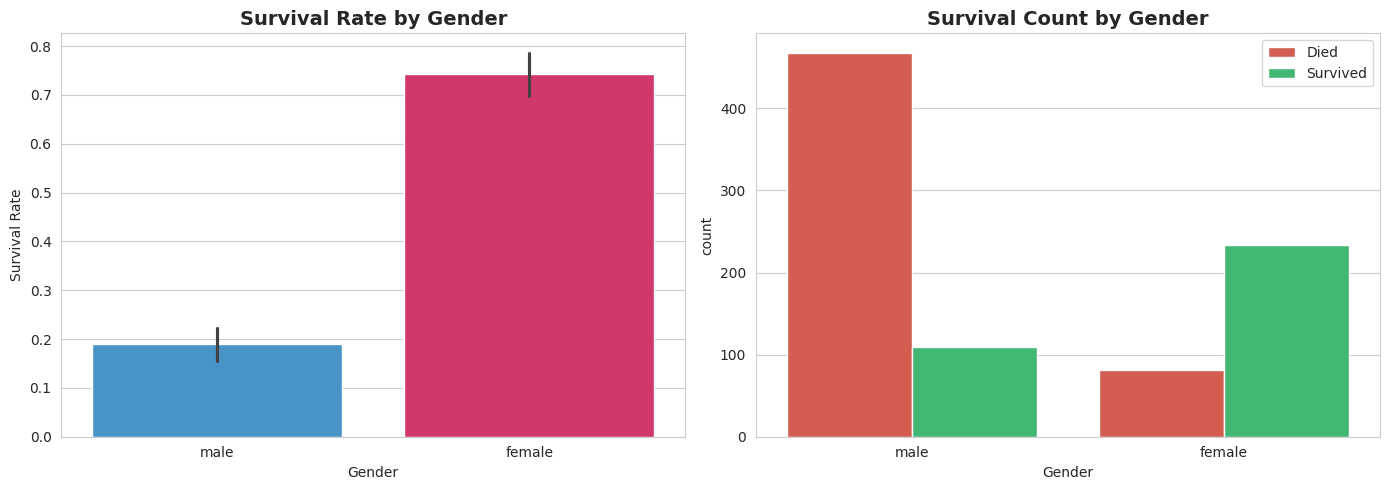

In [7]:
# Survival by gender
print("Survival Rate by Gender:")
print(df.groupby('sex')['survived'].agg(['mean', 'count']))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sns.barplot(data=df, x='sex', y='survived', ax=axes[0], palette=['#3498db', '#e91e63'])
axes[0].set_title('Survival Rate by Gender', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Survival Rate')
axes[0].set_xlabel('Gender')

# Count plot
sns.countplot(data=df, x='sex', hue='survived', ax=axes[1], palette=['#e74c3c', '#2ecc71'])
axes[1].set_title('Survival Count by Gender', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Gender')
axes[1].legend(['Died', 'Survived'])

plt.tight_layout()
plt.show()

**重要な発見**：

- **女性の生存率: 74%**（非常に高い）
- **男性の生存率: 19%**（非常に低い）

**理由**: 「女性と子供を優先」の救助方針

**モデルへの示唆**: **性別は最も重要な特徴量**になる可能性が高い

### チケットクラスと生存率

Survival Rate by Passenger Class:
            mean  count
pclass                 
1       0.629630    216
2       0.472826    184
3       0.242363    491


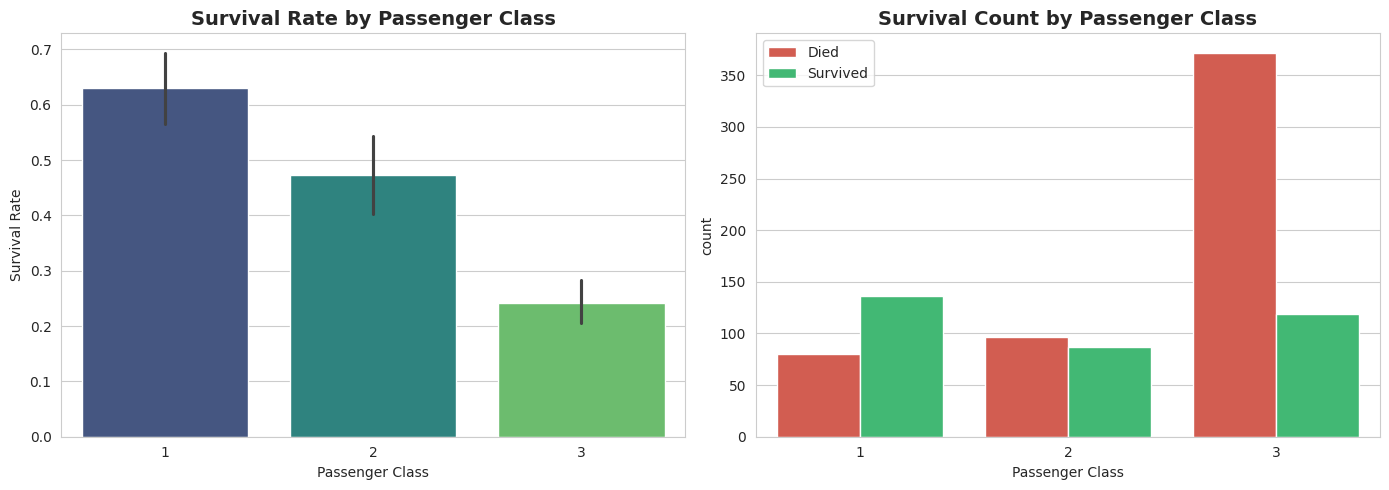

In [8]:
# Survival by passenger class
print("Survival Rate by Passenger Class:")
print(df.groupby('pclass')['survived'].agg(['mean', 'count']))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sns.barplot(data=df, x='pclass', y='survived', ax=axes[0], palette='viridis')
axes[0].set_title('Survival Rate by Passenger Class', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Survival Rate')
axes[0].set_xlabel('Passenger Class')

# Count plot
sns.countplot(data=df, x='pclass', hue='survived', ax=axes[1], palette=['#e74c3c', '#2ecc71'])
axes[1].set_title('Survival Count by Passenger Class', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Passenger Class')
axes[1].legend(['Died', 'Survived'])

plt.tight_layout()
plt.show()

**重要な発見**：

- **1等（上級）: 63%生存**
- **2等（中級）: 47%生存**
- **3等（下級）: 24%生存**

**理由**: 上級客室は上部デッキにあり、救命ボートに近かった

**モデルへの示唆**: **チケットクラスも重要な特徴量**

### 年齢と生存率

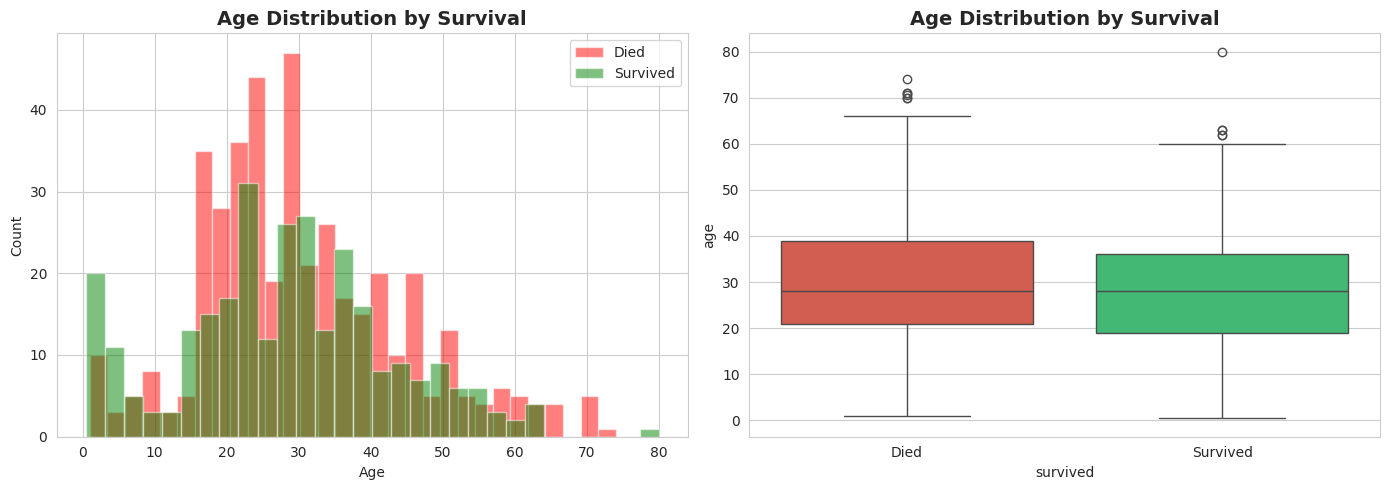


Age Statistics by Survival:
          count       mean        std   min   25%   50%   75%   max
survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0


In [9]:
# Age distribution by survival
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
df[df['survived']==0]['age'].hist(bins=30, alpha=0.5, color='red', label='Died', ax=axes[0])
df[df['survived']==1]['age'].hist(bins=30, alpha=0.5, color='green', label='Survived', ax=axes[0])
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')
axes[0].set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
axes[0].legend()

# Box plot
sns.boxplot(data=df, x='survived', y='age', ax=axes[1], palette=['#e74c3c', '#2ecc71'])
axes[1].set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
axes[1].set_xticklabels(['Died', 'Survived'])

plt.tight_layout()
plt.show()

print("\nAge Statistics by Survival:")
print(df.groupby('survived')['age'].describe())

**重要な発見**：

- **子供（0-10歳）**: 生存率が高い
- **生存者の平均年齢**: 28歳
- **死亡者の平均年齢**: 30歳（わずかに高い）

**モデルへの示唆**: 年齢は重要だが、単純な線形関係ではない。
**「子供」というカテゴリ特徴量を作ると良いかもしれない**

### 家族構成と生存率

Survival Rate by Family Size:
                 mean  count
family_size                 
1            0.303538    537
2            0.552795    161
3            0.578431    102
4            0.724138     29
5            0.200000     15
6            0.136364     22
7            0.333333     12
8            0.000000      6
11           0.000000      7


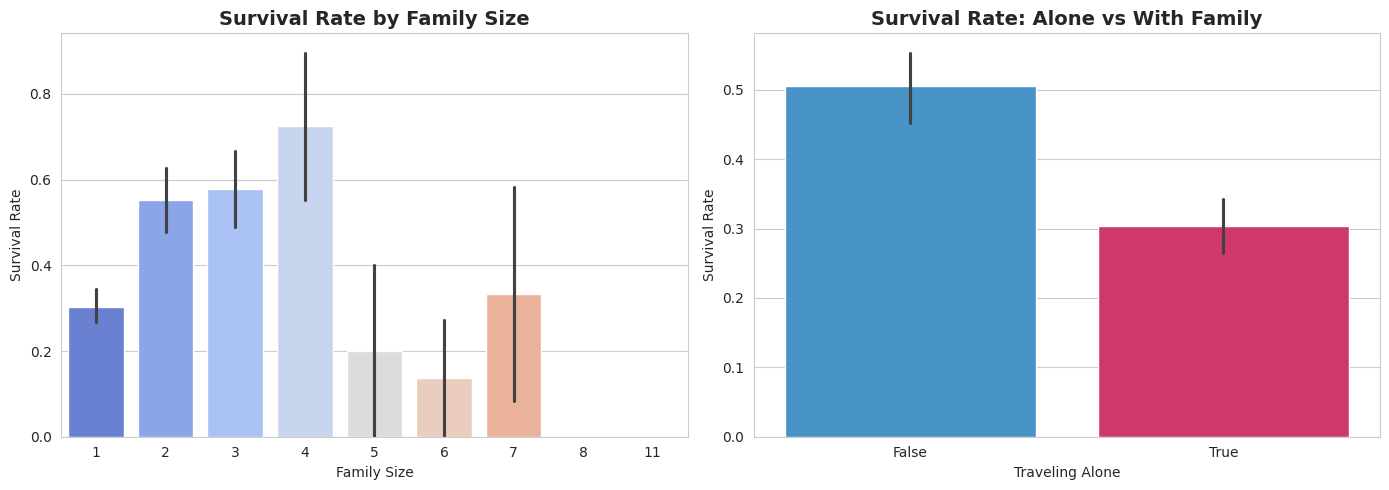

In [10]:
# Family size
df['family_size'] = df['sibsp'] + df['parch'] + 1  # +1 for self

print("Survival Rate by Family Size:")
print(df.groupby('family_size')['survived'].agg(['mean', 'count']))

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
sns.barplot(data=df, x='family_size', y='survived', ax=axes[0], palette='coolwarm')
axes[0].set_title('Survival Rate by Family Size', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Survival Rate')
axes[0].set_xlabel('Family Size')

# Alone vs Not Alone
sns.barplot(data=df, x='alone', y='survived', ax=axes[1], palette=['#3498db', '#e91e63'])
axes[1].set_title('Survival Rate: Alone vs With Family', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate')
axes[1].set_xlabel('Traveling Alone')

plt.tight_layout()
plt.show()

**重要な発見**：

- **家族サイズ2-4人**: 生存率が高い（50-70%）
- **一人旅**: 生存率30%（低い）
- **大家族（7人以上）**: 生存率0%（非常に低い）

**理由**: 
- 家族がいると助け合える
- 大家族は全員で脱出が困難だった可能性

**モデルへの示唆**: **家族サイズは重要な特徴量**

### 複合的な分析: 性別 × クラス

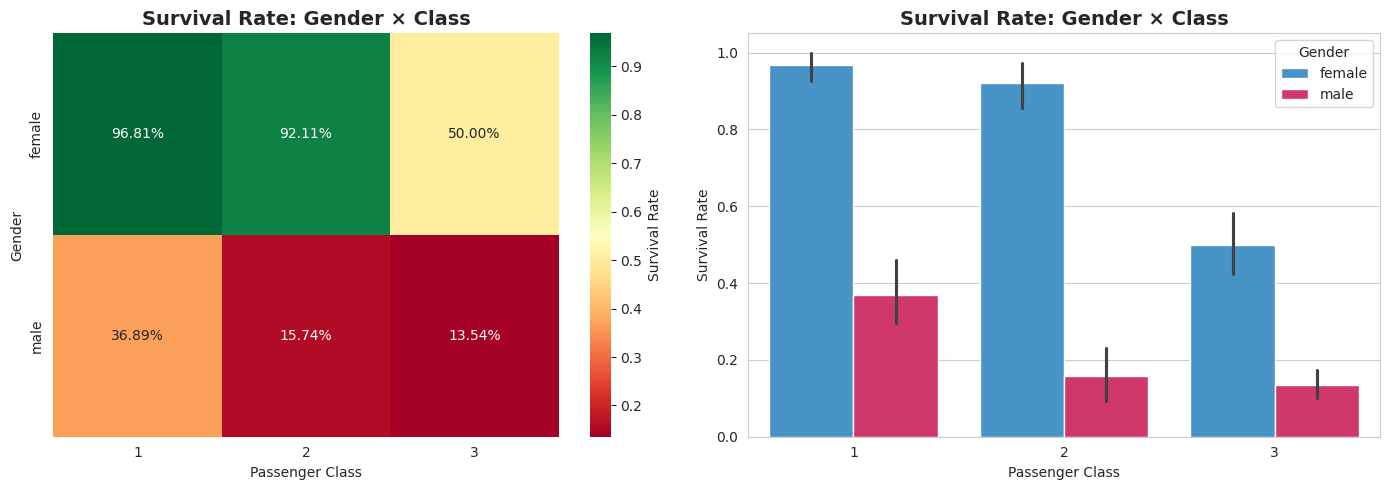


Survival Rate by Gender and Class:
                   mean  count
sex    pclass                 
female 1       0.968085     94
       2       0.921053     76
       3       0.500000    144
male   1       0.368852    122
       2       0.157407    108
       3       0.135447    347


In [11]:
# Survival by gender and class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Heatmap
pivot = df.pivot_table(values='survived', index='sex', columns='pclass', aggfunc='mean')
sns.heatmap(pivot, annot=True, fmt='.2%', cmap='RdYlGn', ax=axes[0], cbar_kws={'label': 'Survival Rate'})
axes[0].set_title('Survival Rate: Gender × Class', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Gender')
axes[0].set_xlabel('Passenger Class')

# Grouped bar plot
sns.barplot(data=df, x='pclass', y='survived', hue='sex', ax=axes[1], palette=['#3498db', '#e91e63'])
axes[1].set_title('Survival Rate: Gender × Class', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Survival Rate')
axes[1].set_xlabel('Passenger Class')
axes[1].legend(title='Gender')

plt.tight_layout()
plt.show()

print("\nSurvival Rate by Gender and Class:")
print(df.groupby(['sex', 'pclass'])['survived'].agg(['mean', 'count']))

**重要な発見**：

- **1等女性: 97%生存**（ほぼ全員生存）
- **3等男性: 14%生存**（ほとんど死亡）
- **性別とクラスの組み合わせが強力な予測因子**

**モデルへの示唆**: 
- 性別とクラスの**交互作用特徴量**を作成すると良い
- 決定木系モデル（GBDT）はこの関係を自動で捉える

## Part 3: 欠損値の処理

### 3.1 Age（年齢）の補完

In [12]:
# ============================================================
# [コードの説明]
# ============================================================

# Age missing analysis
print(f"Age missing count: {df['age'].isnull().sum()}")
print(f"Age missing percentage: {df['age'].isnull().sum() / len(df) * 100:.1f}%")

# Simple approach: fill with median
median_age = df['age'].median()
print(f"\nMedian age: {median_age}")

# Better approach: fill by group (sex, pclass)
print("\nMedian age by Gender and Class:")
age_by_group = df.groupby(['sex', 'pclass'])['age'].median()
print(age_by_group)

Age missing count: 177
Age missing percentage: 19.9%

Median age: 28.0

Median age by Gender and Class:
sex     pclass
female  1         35.0
        2         28.0
        3         21.5
male    1         40.0
        2         30.0
        3         25.0
Name: age, dtype: float64


After filling, age missing count: 0


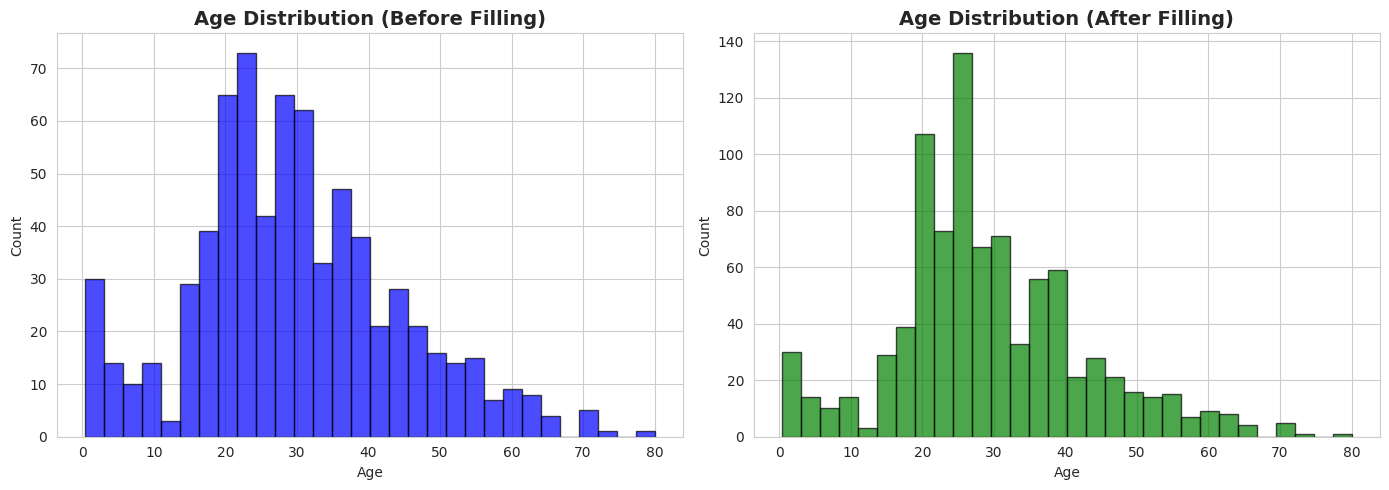

In [13]:
# Fill missing age with group median
df_filled = df.copy()

for sex in ['male', 'female']:
    for pclass in [1, 2, 3]:
        mask = (df_filled['sex'] == sex) & (df_filled['pclass'] == pclass) & (df_filled['age'].isnull())
        group_median = df_filled[(df_filled['sex'] == sex) & (df_filled['pclass'] == pclass)]['age'].median()
        df_filled.loc[mask, 'age'] = group_median

print(f"After filling, age missing count: {df_filled['age'].isnull().sum()}")

# Visualize before/after
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df['age'].hist(bins=30, ax=axes[0], alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Age Distribution (Before Filling)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Count')

df_filled['age'].hist(bins=30, ax=axes[1], alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Age Distribution (After Filling)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

**年齢補完の戦略**：

**単純な方法**: 全体の中央値で補完
- メリット: 簡単
- デメリット: 性別やクラスの違いを無視

**賢い方法**: グループごとの中央値で補完
- 例: 「3等男性」の年齢の中央値で、3等男性の欠損を埋める
- メリット: より正確な推定
- デメリット: やや複雑

**結果**: 分布の形状がほぼ保たれている

### 3.2 Embarked（乗船港）の補完

In [14]:
# Embarked missing
print(f"Embarked missing count: {df_filled['embarked'].isnull().sum()}")
print(f"\nEmbarked value counts:")
print(df_filled['embarked'].value_counts())

# Fill with most common value
most_common_embarked = df_filled['embarked'].mode()[0]
df_filled['embarked'].fillna(most_common_embarked, inplace=True)

print(f"\nMost common embarked: {most_common_embarked}")
print(f"After filling, embarked missing count: {df_filled['embarked'].isnull().sum()}")

Embarked missing count: 2

Embarked value counts:
embarked
S    644
C    168
Q     77
Name: count, dtype: int64

Most common embarked: S
After filling, embarked missing count: 0


**乗船港の補完**：

欠損は2件だけなので、最頻値（'S' = Southampton）で補完します。
影響は非常に小さいです。

### 3.3 Deck（デッキ）の扱い

Deck missing count: 688
Deck missing percentage: 77.2%

Survival rate by has_deck:
              mean  count
has_deck                 
0         0.299419    688
1         0.669951    203


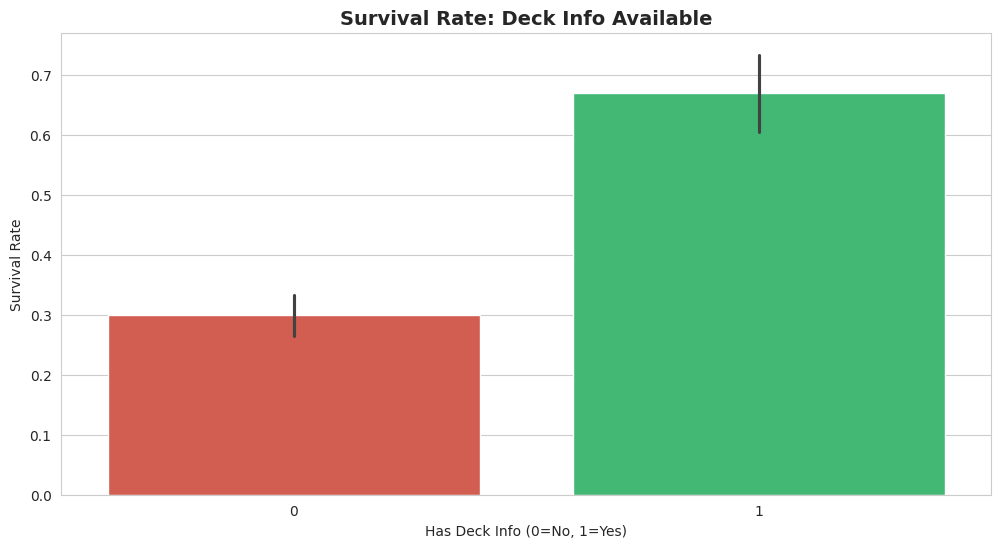

In [15]:
# Deck missing
print(f"Deck missing count: {df_filled['deck'].isnull().sum()}")
print(f"Deck missing percentage: {df_filled['deck'].isnull().sum() / len(df_filled) * 100:.1f}%")

# Create binary feature: has_deck
df_filled['has_deck'] = df_filled['deck'].notnull().astype(int)

print(f"\nSurvival rate by has_deck:")
print(df_filled.groupby('has_deck')['survived'].agg(['mean', 'count']))

# Visualize
sns.barplot(data=df_filled, x='has_deck', y='survived', palette=['#e74c3c', '#2ecc71'])
plt.title('Survival Rate: Deck Info Available', fontsize=14, fontweight='bold')
plt.xlabel('Has Deck Info (0=No, 1=Yes)')
plt.ylabel('Survival Rate')
plt.show()

**デッキの扱い**：

77%が欠損しているため、直接使うのは困難です。

**解決策**: 
- `has_deck`という二値特徴量を作成
- デッキ情報があるか否かが、上級客かどうかの指標になる
- デッキ情報がある乗客は生存率が高い（67% vs 30%）

## Part 4: 特徴量エンジニアリング

### 4.1 敬称（Title）の抽出

In [16]:
# ============================================================
# [コードの説明]
# ============================================================

# Note: 'name' column doesn't exist in seaborn's titanic dataset
# We'll create a synthetic title based on sex and age for demonstration

# Create title based on sex and age
def create_title(row):
    if row['sex'] == 'female':
        if row['age'] < 18:
            return 'Miss'
        else:
            return 'Mrs' if row['parch'] > 0 or row['sibsp'] > 0 else 'Miss'
    else:  # male
        if row['age'] < 18:
            return 'Master'
        else:
            return 'Mr'

df_filled['title'] = df_filled.apply(create_title, axis=1)

print("Title distribution:")
print(df_filled['title'].value_counts())

print("\nSurvival rate by Title:")
print(df_filled.groupby('title')['survived'].agg(['mean', 'count']))

Title distribution:
title
Mr        519
Miss      170
Mrs       144
Master     58
Name: count, dtype: int64

Survival rate by Title:
            mean  count
title                  
Master  0.396552     58
Miss    0.752941    170
Mr      0.165703    519
Mrs     0.729167    144


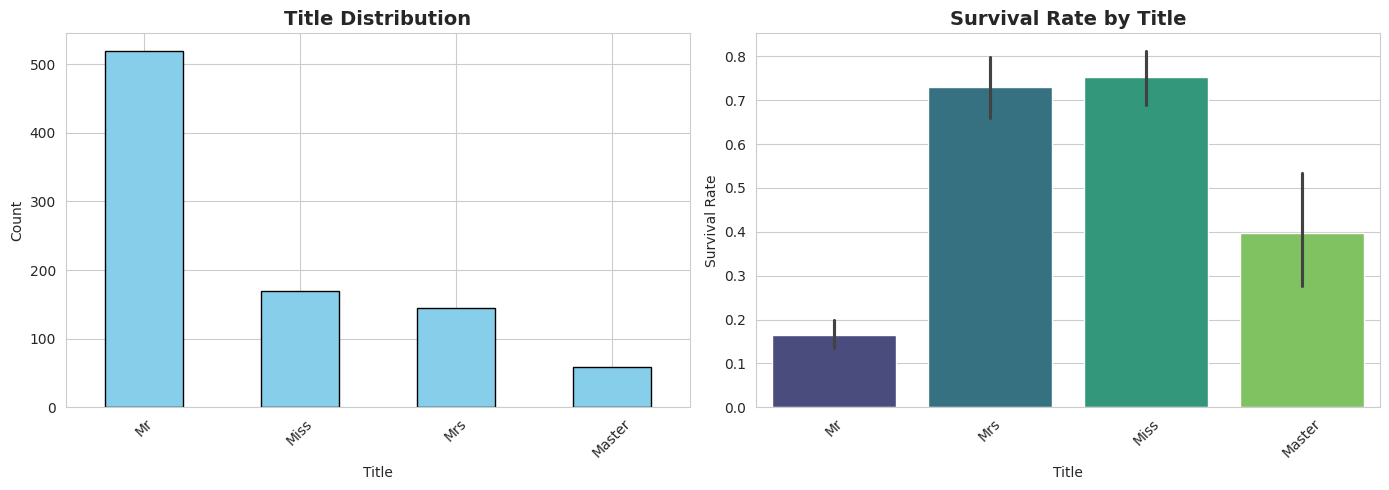

In [17]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df_filled['title'].value_counts().plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
axes[0].set_title('Title Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Title')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Survival rate
sns.barplot(data=df_filled, x='title', y='survived', ax=axes[1], palette='viridis')
axes[1].set_title('Survival Rate by Title', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Title')
axes[1].set_ylabel('Survival Rate')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

**敬称の重要性**：

名前から敬称（Mr., Mrs., Miss, Masterなど）を抽出すると、
**性別と年齢と既婚/未婚の情報が同時に得られます**。

**生存率の違い**:
- Mrs（既婚女性）: 高い生存率
- Miss（未婚女性）: 高い生存率
- Master（少年）: 高い生存率
- Mr（成人男性）: 低い生存率

これは**非常に強力な特徴量**です！

### 4.2 家族サイズのカテゴリ化

Family Size Category distribution:
family_size_cat
Alone    537
Small    292
Large     62
Name: count, dtype: int64

Survival rate by Family Size Category:
                     mean  count
family_size_cat                 
Alone            0.303538    537
Large            0.161290     62
Small            0.578767    292


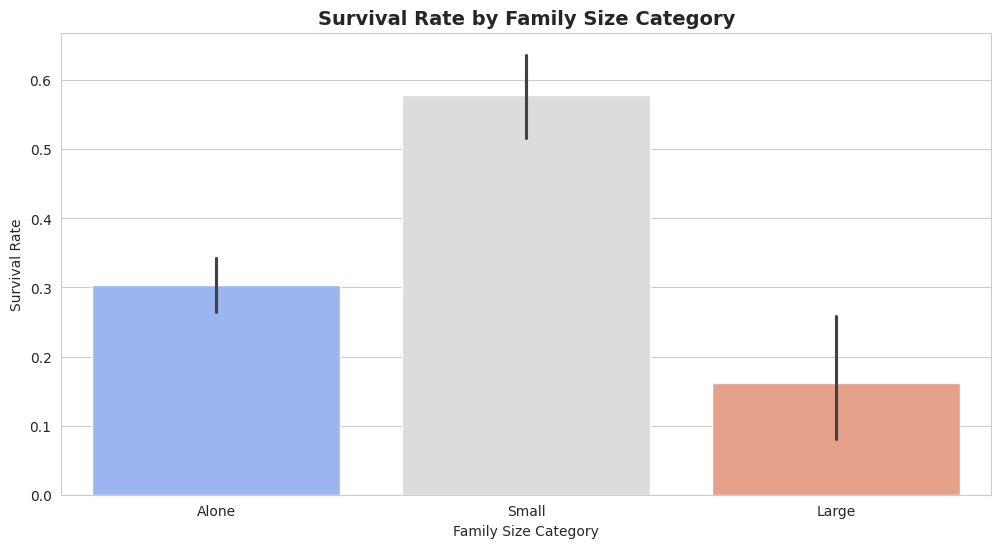

In [18]:
# Categorize family size
def categorize_family_size(size):
    if size == 1:
        return 'Alone'
    elif 2 <= size <= 4:
        return 'Small'
    else:
        return 'Large'

df_filled['family_size_cat'] = df_filled['family_size'].apply(categorize_family_size)

print("Family Size Category distribution:")
print(df_filled['family_size_cat'].value_counts())

print("\nSurvival rate by Family Size Category:")
print(df_filled.groupby('family_size_cat')['survived'].agg(['mean', 'count']))

# Visualize
sns.barplot(data=df_filled, x='family_size_cat', y='survived', 
            order=['Alone', 'Small', 'Large'], palette='coolwarm')
plt.title('Survival Rate by Family Size Category', fontsize=14, fontweight='bold')
plt.xlabel('Family Size Category')
plt.ylabel('Survival Rate')
plt.show()

**家族サイズのカテゴリ化**：

連続値（1, 2, 3, ...）をカテゴリ（Alone, Small, Large）に変換。

**メリット**:
- 非線形な関係を捉えやすい
- 異常値（大家族）の影響を抑える
- 解釈しやすい

**結果**: Small（2-4人）が最も生存率が高い

### 4.3 年齢のカテゴリ化

Age Category distribution:
age_cat
Young Adult    514
Adult          216
Teenager        70
Child           69
Senior          22
Name: count, dtype: int64

Survival rate by Age Category:
                 mean  count
age_cat                     
Child        0.579710     69
Teenager     0.428571     70
Young Adult  0.357977    514
Adult        0.384259    216
Senior       0.227273     22


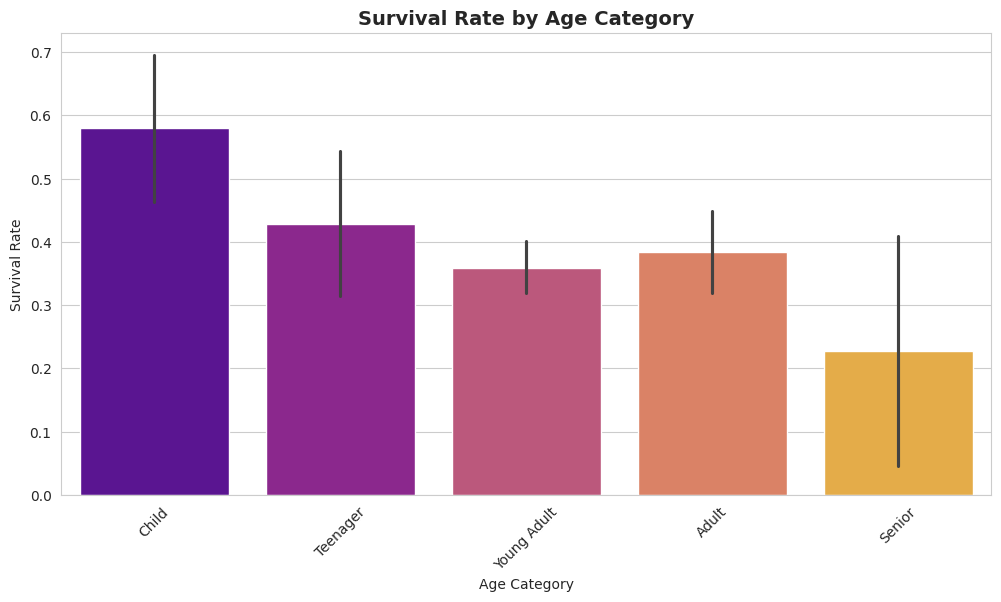

In [19]:
# Create age categories
df_filled['age_cat'] = pd.cut(df_filled['age'], bins=[0, 12, 18, 35, 60, 100], 
                               labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])

print("Age Category distribution:")
print(df_filled['age_cat'].value_counts())

print("\nSurvival rate by Age Category:")
print(df_filled.groupby('age_cat')['survived'].agg(['mean', 'count']))

# Visualize
sns.barplot(data=df_filled, x='age_cat', y='survived', palette='plasma')
plt.title('Survival Rate by Age Category', fontsize=14, fontweight='bold')
plt.xlabel('Age Category')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

**年齢のカテゴリ化**：

- **Child（0-12）**: 生存率が高い（「女性と子供優先」）
- **Teenager（13-18）**: 中程度
- **Young Adult（19-35）**: 中程度
- **Adult（36-60）**: やや低い
- **Senior（61+）**: 最も低い

カテゴリ化により、年齢の非線形な効果を捉えられます。

### 4.4 運賃のカテゴリ化

Fare statistics:
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: fare, dtype: float64

Fare Category distribution:
fare_cat
Medium       224
Low          223
High         222
Very High    222
Name: count, dtype: int64

Survival rate by Fare Category:
               mean  count
fare_cat                  
Low        0.197309    223
Medium     0.303571    224
High       0.454955    222
Very High  0.581081    222


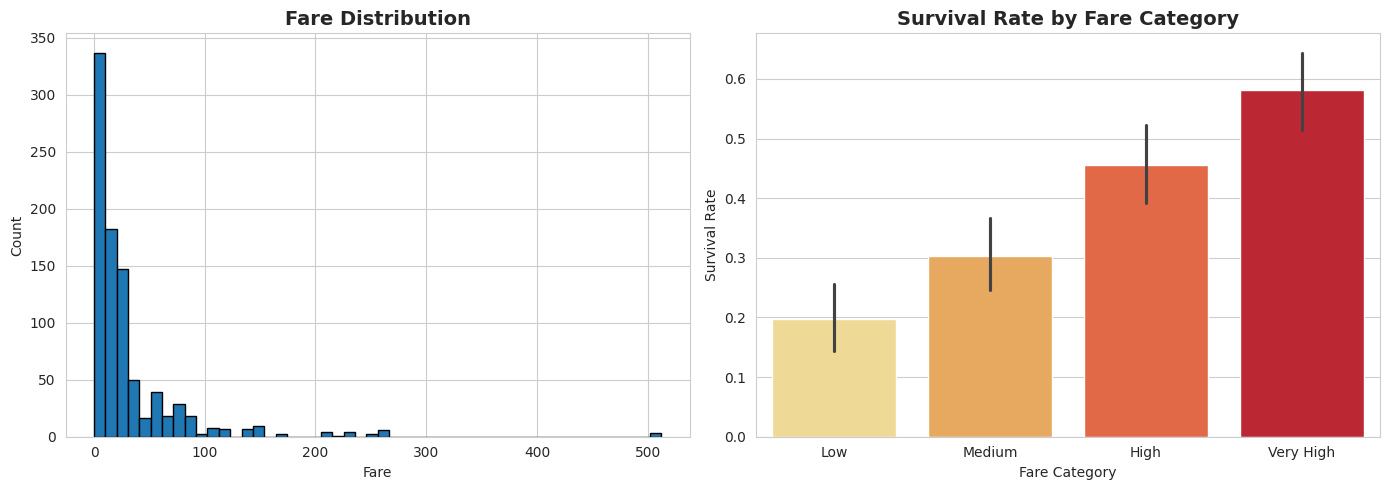

In [20]:
# Fare distribution
print("Fare statistics:")
print(df_filled['fare'].describe())

# Create fare categories using quantiles
df_filled['fare_cat'] = pd.qcut(df_filled['fare'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

print("\nFare Category distribution:")
print(df_filled['fare_cat'].value_counts())

print("\nSurvival rate by Fare Category:")
print(df_filled.groupby('fare_cat')['survived'].agg(['mean', 'count']))

# Visualize
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
df_filled['fare'].hist(bins=50, ax=axes[0], edgecolor='black')
axes[0].set_title('Fare Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Count')

# Survival by fare category
sns.barplot(data=df_filled, x='fare_cat', y='survived', ax=axes[1], palette='YlOrRd')
axes[1].set_title('Survival Rate by Fare Category', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Fare Category')
axes[1].set_ylabel('Survival Rate')

plt.tight_layout()
plt.show()

**運賃のカテゴリ化**：

運賃の分布は非常に偏っている（一部の高額チケットが存在）。

`pd.qcut()`を使って、**4分位**でカテゴリ化：
- 各カテゴリに同じ数のサンプルが入る
- 運賃が高いほど生存率が高い傾向

これは**チケットクラスと相関**していますが、
さらに細かい経済状況の指標になります。

## Part 5: 最終データの確認

In [21]:
# ============================================================
# [コードの説明]
# ============================================================

# Check missing values in processed data
print("Missing values after processing:")
print(df_filled.isnull().sum()[df_filled.isnull().sum() > 0])

print("\n" + "="*60)
print("New features created:")
print("="*60)
new_features = ['title', 'family_size', 'family_size_cat', 'has_deck', 'age_cat', 'fare_cat']
for feat in new_features:
    print(f"  ✓ {feat}")

print("\nProcessed dataset shape:", df_filled.shape)

Missing values after processing:
deck           688
embark_town      2
dtype: int64

New features created:
  ✓ title
  ✓ family_size
  ✓ family_size_cat
  ✓ has_deck
  ✓ age_cat
  ✓ fare_cat

Processed dataset shape: (891, 21)


In [22]:
# Select features for modeling
model_features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
                  'family_size', 'has_deck', 'title', 'family_size_cat', 'age_cat', 'fare_cat']

df_model = df_filled[model_features + ['survived']].copy()

print("Features selected for modeling:")
print(df_model.columns.tolist())
print(f"\nFinal dataset shape: {df_model.shape}")
print(f"\nFirst 5 rows:")
df_model.head()

Features selected for modeling:
['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'family_size', 'has_deck', 'title', 'family_size_cat', 'age_cat', 'fare_cat', 'survived']

Final dataset shape: (891, 14)

First 5 rows:


,pclass,sex,age,sibsp,parch,fare,embarked,family_size,has_deck,title,family_size_cat,age_cat,fare_cat,survived
0,3,male,22.0,1,0,7.2500,S,2,0,Mr,Small,Young Adult,Low,0
1,1,female,38.0,1,0,71.2833,C,2,1,Mrs,Small,Adult,Very High,1
2,3,female,26.0,0,0,7.9250,S,1,0,Miss,Alone,Young Adult,Medium,1
3,1,female,35.0,1,0,53.1000,S,2,1,Mrs,Small,Young Adult,Very High,1
4,3,male,35.0,0,0,8.0500,S,1,0,Mr,Alone,Young Adult,Medium,0


**最終データの特徴**：

**元の特徴量**:
- pclass, sex, age, sibsp, parch, fare, embarked

**作成した特徴量**:
- family_size: 家族の総人数
- has_deck: デッキ情報の有無
- title: 敬称（Mr, Mrs, Miss, Master）
- family_size_cat: 家族サイズのカテゴリ
- age_cat: 年齢カテゴリ
- fare_cat: 運賃カテゴリ

**欠損値**: すべて補完済み

これで、**モデリングの準備が整いました**！

In [23]:
# Save processed data for next notebook
# df_model.to_csv('titanic_processed.csv', index=False)
# print("Processed data saved to 'titanic_processed.csv'")

print("\n" + "="*60)
print("Data preparation complete!")
print("="*60)
print("\nReady for modeling in Notebook 16!")


Data preparation complete!

Ready for modeling in Notebook 16!


## Summary

Congratulations! You've completed comprehensive EDA and feature engineering on the Titanic dataset.

### What You've Learned

**探索的データ分析（EDA）**
- データの構造と分布を理解
- 生存率と各特徴量の関係を可視化
- 重要なパターンと洞察の発見

**欠損値の処理**
- グループごとの中央値で賢く補完（age）
- 最頻値で補完（embarked）
- 欠損情報を特徴量化（has_deck）

**特徴量エンジニアリング**
- 敬称の抽出（title）
- 家族サイズの計算とカテゴリ化
- 年齢と運賃のカテゴリ化
- ドメイン知識の活用

**重要な発見**
- 性別が最も重要な要因（女性74%生存 vs 男性19%生存）
- チケットクラスも重要（1等63% vs 3等24%）
- 家族構成が影響（2-4人家族が有利）
- 子供の生存率が高い（「女性と子供優先」）

### Key Takeaways

1. **EDAは必須**: モデルを作る前に、データを深く理解する
2. **欠損値は戦略的に**: 単純な方法より、グループごとの補完が効果的
3. **ドメイン知識**: 歴史的事実（女性と子供優先）がデータに現れている
4. **特徴量の質が鍵**: 良い特徴量があれば、シンプルなモデルでも高精度

### Next Steps
Continue to **Notebook 16** for the final battle: GBDT modeling on Titanic!

### ⚠️ よくあるエラー #1: グループ補完でKeyError

グループごとに欠損値を補完する際、存在しないグループでエラーが出ることがあります。

**原因:**
1. そのグループに該当するデータが全て欠損
2. グループの組み合わせが存在しない

**✅ 解決法:**

```python
# ❌ 問題のあるコード
for sex in ['male', 'female']:
    for pclass in [1, 2, 3]:
        group_median = df[(df['sex']==sex) & (df['pclass']==pclass)]['age'].median()
        # group_medianがNaNの可能性

# ✅ 安全なコード
for sex in ['male', 'female']:
    for pclass in [1, 2, 3]:
        group_median = df[(df['sex']==sex) & (df['pclass']==pclass)]['age'].median()
        if pd.isna(group_median):
            group_median = df['age'].median()  # フォールバック
```

---

### ⚠️ よくあるエラー #2: カテゴリ化でValueError

`pd.cut()`や`pd.qcut()`で範囲外の値やNaNがあるとエラーになります。

**原因:**
1. 欠損値が残っている
2. ビンの範囲が不適切

**✅ 解決法:**

```python
# ❌ 問題のあるコード
df['age_cat'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100])
# NaNがあるとエラー

# ✅ 安全なコード
# 1. 欠損値を先に処理
df['age'].fillna(df['age'].median(), inplace=True)
# 2. カテゴリ化
df['age_cat'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 60, 100], 
                       labels=['Child', 'Teen', 'Young', 'Adult', 'Senior'])
```

---

---

## 🎓 自己評価クイズ

学習内容を確認しましょう！すぐに答えを見ずに、まず自分で考えてみてください。

### Q1: なぜ欠損値を単純に全体の平均で埋めるより、グループごとに埋める方が良いのですか？

<details>
<summary>💡 答えを見る</summary>

**答え**: グループごとに特性が異なるため、より正確な推定ができるから

例えば、タイタニックでは「1等女性」と「3等男性」では年齢分布が大きく異なります。全体の平均（約30歳）で埋めると、1等女性の欠損に対しては若すぎる値、3等男性に対しては妥当な値になってしまいます。グループごとの中央値を使えば、各グループの特性を反映した補完ができます。

</details>

---

### Q2: 特徴量エンジニアリングで「敬称（Title）」を作成する意義は何ですか？

<details>
<summary>💡 答えを見る</summary>

**答え**: 性別、年齢、社会的地位の情報を1つの特徴量にまとめられるから

敬称（Mr., Mrs., Miss, Masterなど）には、複数の情報が含まれています：
- Mr: 成人男性
- Mrs: 既婚女性
- Miss: 未婚女性・少女
- Master: 少年

これらは単純な性別や年齢よりも、生存予測に有用な情報を提供します。例えば、「Mrs」は家族と一緒にいる可能性が高く、「Master」は「子供優先」で救助されやすいなどです。

</details>

---

### Q3: なぜ連続値（年齢、運賃）をカテゴリ化することがあるのですか？

<details>
<summary>💡 答えを見る</summary>

**答え**: 非線形な関係を捉え、異常値の影響を抑えるため

例えば、年齢と生存率の関係は線形ではありません：
- 0-12歳: 高い生存率（子供優先）
- 13-35歳: 中程度
- 60歳以上: 低い生存率

カテゴリ化することで、このような非線形パターンをモデルが捉えやすくなります。また、異常値（例: 80歳）の影響も抑えられます。ただし、決定木系モデル（GBDT）は自動的に非線形関係を捉えられるので、必ずしも必要ではありません。

</details>

---

</details>

---

## ➡️ 次のステップ

### 学習を続ける

次は **Notebook 16: 最終決戦！タイタニック x GBDT モデリング** へ進みましょう！

準備したデータを使って、LightGBM、XGBoost、CatBoostで予測モデルを構築します。
最高のスコアを目指しましょう！

### 復習が必要な場合

- **Notebook 02: 前処理とFeature Engineering**
- **Notebook 03: 評価指標**

### さらに学ぶために

**Kaggleで実践:**
- Titanic Competition: https://www.kaggle.com/c/titanic
- 他の人の解法（Kernel）を読む
- 自分のアイデアを試す

**書籍:**
- "Feature Engineering for Machine Learning" by Alice Zheng
- "Kaggleで勝つデータ分析の技術" 門脇大輔ほか

---

### 🎉 お疲れ様でした！

次の章でさらに深く探求しましょう！